In [2]:
import pylhe
import math
import matplotlib.pyplot as plt
import numpy as np
import time
import os

In [3]:
def invariant_mass(p1,p2):
    # if you can understand this one line command, you can use it.
    #return math.sqrt(sum((1 if index=='e' else -1)*(getattr(p1,index)+getattr(p2,index))**2 for index in ['e','px','py','pz']))
    
    p1_e, p1_px, p1_py, p1_pz = p1.e, p1.px, p1.py, p1.pz
    p2_e, p2_px, p2_py, p2_pz = p2.e, p2.px, p2.py, p2.pz
    
    invariant_mass = np.sqrt((p1_e+p2_e)**2-(p1_px+p2_px)**2-(p1_py+p2_py)**2-(p1_pz+p2_pz)**2)
    
    return invariant_mass

In [16]:
# unzip unweighted_events.lhe.gz

os.system("gzip -d ./PROC_DarkHiggs2MDM_2/Events/run_01/unweighted_events.lhe.gz")

256

In [17]:
print(time.strftime("%a %b %d %H:%M:%S %Y", time.localtime()))
ticks_1 = time.time()

# You will change this path according to your environment.
process_path = 'PROC_DarkHiggs2MDM_2/Events/run_01/unweighted_events.lhe' 

monosbb = pylhe.readLHE(process_path)

m_bb, m_dark, event_list = [], [], []

for event in monosbb:
    for i, element in  enumerate(event.particles):
        if element.id == 5: # particle ID 5 stands for bottom quark.
            tmp_p1 = i
            break
    
    for i, element in  enumerate(event.particles):
        if element.id == -5: # particle ID -5 stands for anti-bottom quark.
            tmp_p2 = i
            break
    
    for i, element in  enumerate(event.particles):
        if element.id == 1000022: # particle ID 1000022 stands for dark matter.
            dark_p1 = i
            break
    
    for i, element in  enumerate(event.particles):
        if element.id == 1000022: # particle ID -1000022 stands for dark matter.
            if i != dark_p1:
                dark_p2 = i
                break
    
    
    m_bb.append(invariant_mass(event.particles[tmp_p1],event.particles[tmp_p2]))
    m_dark.append(invariant_mass(event.particles[dark_p1],event.particles[dark_p2]))
    event_list.append(event)
    
m_bb, m_dark = np.array(m_bb), np.array(m_dark)



print("There are {} events in this event list.".format(len(event_list)))

ticks_2 = time.time()
totaltime =  ticks_2 - ticks_1
print("\033[3;33mTime Cost : {:.4f} min\033[0;m".format(totaltime/60.))

Tue Feb 09 07:59:20 2021
There are 10000 events in this event list.
Time Cost : 0.0749 min


In [18]:
dir(event_list[0].particles[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'color1',
 'color2',
 'e',
 'event',
 'fieldnames',
 'fromstring',
 'id',
 'lifetime',
 'm',
 'mother1',
 'mother2',
 'mothers',
 'px',
 'py',
 'pz',
 'spin',
 'status']

In [19]:
print("{:^12}{:^9}{:^12}{:^12}{:^12}{:^12}{:^12}{:^12}{:^12}".format("#","id","mother1","mother2","e","px","py","pz","status"))

for i, element in  enumerate(event_list[0].particles):
    print("{:^12}{:^9.0f}{:^12.0f}{:^12.0f}{:^12.3f}{:^12.3f}{:^12.3f}{:^12.3f}{:^12.0f}".format(i+1, element.id,element.mother1,element.mother2,element.e,element.px,element.py,element.pz,element.status))

     #         id      mother1     mother2        e           px          py          pz        status   
     1         -2         0           0        1182.820     -0.000      0.000      1182.820       -1     
     2          2         0           0        858.176      0.000       -0.000     -858.176       -1     
     3         55         1           2        2040.996     0.000       0.000      324.643        2      
     4         54         3           3        107.916     -21.578      32.919      44.683        2      
     5       1000022      3           3        1071.169    -303.344    -586.137    819.652        1      
     6       1000022      3           3        861.912     324.921     553.219     -539.691       1      
     7          5         4           4         56.470     -37.401     -15.485      39.092        1      
     8         -5         4           4         51.445      15.823      48.404      5.591         1      


(0.5, 10000)

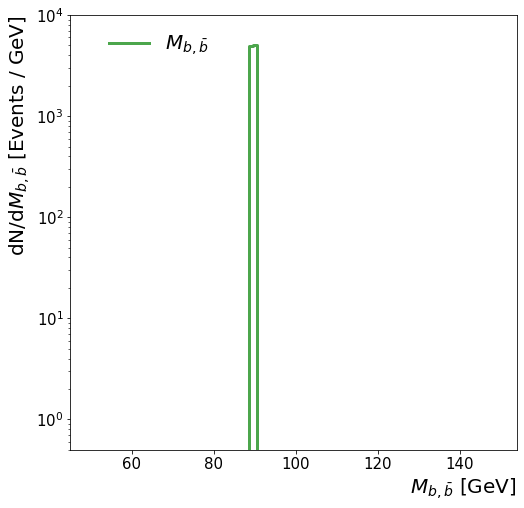

In [21]:
plt.figure(figsize=(8,8)) # plotsize

bin_size = np.linspace(50,150,101)
hist, bins = np.histogram(m_bb, bins=bin_size)
plt.step(bins[:-1], hist.astype(np.float32),color = "green", where='mid',linewidth=3, alpha=0.7,label="$M_{b,\\bar{b}}$") 

plt.legend(bbox_to_anchor=(0.35, 1),ncol=2,fontsize=20,frameon=False) # plot label tag
plt.yscale('log') 
plt.xlabel("$M_{b,\\bar{b}}$ [GeV]" , fontsize=20, horizontalalignment='right',x=1)  # plot x-axis label
plt.ylabel("dN/d$M_{b,\\bar{b}}$ [Events / GeV]", fontsize=20, horizontalalignment='right',y=1)  # plot y-axis label
plt.xticks(fontsize=15)   # set x-ticks size
plt.yticks(fontsize=15)   # set y-ticks size 
plt.ylim((0.5,10000))
# plt.savefig("./invariant_mass_bb.png")  #save figure as png

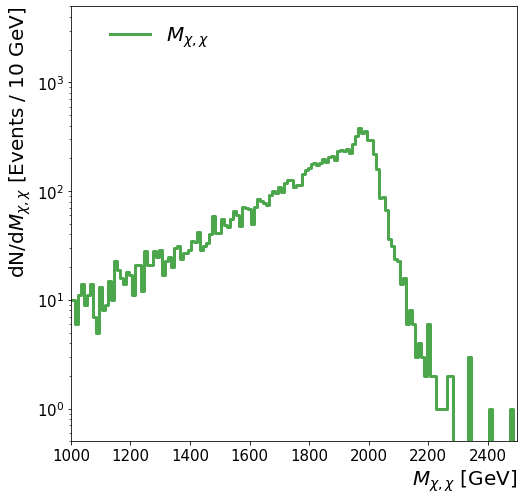

In [22]:
plt.figure(figsize=(8,8)) # plotsize

bin_size = np.linspace(1000,2500,151)
hist, bins = np.histogram(m_dark, bins=bin_size)
plt.step(bins[:-1], hist.astype(np.float32),color = "green", where='mid',linewidth=3, alpha=0.7,label="$M_{\chi,\chi}$") 

plt.legend(bbox_to_anchor=(0.35, 1),ncol=2,fontsize=20,frameon=False) # plot label tag
plt.yscale('log') 
plt.xlabel("$M_{\chi,\chi}$ [GeV]" , fontsize=20, horizontalalignment='right',x=1)  # plot x-axis label
plt.ylabel("dN/d$M_{\chi,\chi}$ [Events / 10 GeV]", fontsize=20, horizontalalignment='right',y=1)  # plot y-axis label
plt.xticks(fontsize=15)   # set x-ticks size
plt.yticks(fontsize=15)   # set y-ticks size 
plt.ylim((0.5,5000))
plt.xlim((1000,2500))
# plt.savefig("./invariant_mass_darkmatters.png")  #save figure as png
plt.show()